# RQ1 - Eyetracking Fixation Metrics

## Import Libraries

In [6]:
import math

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import utils.GenSnippetsLib as gsl
import os

In [7]:
screen_resolution = (1920, 1080)

## Import Eyetracking Data

In [8]:
df_query = pd.read_csv("./data/filteredData/filtered_data.csv")
df_eyetracking_events = pd.DataFrame(columns=["Participant", "Algorithm", "Path"])
snippets = df_query["Algorithm"].unique()
participants = df_query["Participant"].unique()
for participant in participants:
    for snippet in snippets:
        path = f"./data/filteredData/Participant{str(participant).zfill(2)}/{snippet}_Code_eyetracking.csv"
        # check if path exists
        if os.path.exists(path):
            df_eyetracking_events.loc[len(df_eyetracking_events)] = [participant, snippet, path]
df_eyetracking_events

,Participant,Algorithm,Path
0,1,IsPrime,./data/filteredData/Participant01/IsPrime_Code...
1,1,SiebDesEratosthenes,./data/filteredData/Participant01/SiebDesErato...
2,1,IsAnagram,./data/filteredData/Participant01/IsAnagram_Co...
3,1,RemoveDoubleChar,./data/filteredData/Participant01/RemoveDouble...
4,1,BinToDecimal,./data/filteredData/Participant01/BinToDecimal...
...,...,...,...
1067,71,BogoSort,./data/filteredData/Participant71/BogoSort_Cod...
1068,71,ReverseQueue,./data/filteredData/Participant71/ReverseQueue...
1069,71,Ackerman,./data/filteredData/Participant71/Ackerman_Cod...
1070,71,RabbitTortoise,./data/filteredData/Participant71/RabbitTortoi...


In [9]:
df_filtered = pd.read_csv("./data/filteredData/filtered_data.csv")
Algorithms = df_filtered["Algorithm"].unique()
Participants = df_filtered[df_filtered["IsOutlier"] == False]["Participant"].unique()

# Saccade Based Metrics

In [12]:
df_saccades = pd.DataFrame([], columns=["Algorithm", "Participant", "SaccadeDuration", "startTime", "endTime", "PeakVel", "AvgVel", "start_x", "end_x", "start_y", "end_y"])
labels = set()
for snippet in tqdm(Algorithms):
    for participant in Participants:
        df_grouped = df_eyetracking_events[(df_eyetracking_events["Participant"] == participant) &
                                           (df_eyetracking_events["Algorithm"] == snippet)]
        if len(df_grouped) == 0:
            continue

        eyetracking_path = df_grouped["Path"].values[0]
        df_current_eyetracking = pd.read_csv(eyetracking_path)
        label = df_current_eyetracking["label"].unique()
        labels.update(label)
        df_sacc = df_current_eyetracking[(df_current_eyetracking["label"] == "SACC") | (df_current_eyetracking["label"] == "ISAC")]

        for sac_idx, sac_row in df_sacc.iterrows():
            sac_start = sac_row["start_time"]
            sac_end = sac_row["end_time"]
            sac_duration = sac_end - sac_start
            df_saccades.loc[len(df_saccades)] = [snippet, participant, sac_duration, sac_start, sac_end, sac_row["peak_vel"], sac_row["avg_vel"],
                                                 sac_row["start_x"], sac_row["end_x"], sac_row["start_y"], sac_row["end_y"]]


  0%|          | 0/32 [00:00<?, ?it/s]

In [13]:
# save the results
df_saccades.to_csv("./data/saccades_per_participant.csv", index=False)

In [10]:
# load result
df_saccades = pd.read_csv("./data/saccades_per_participant.csv")

In [11]:
df_saccades

,Algorithm,Participant,SaccadeDuration,startTime,endTime,PeakVel,AvgVel,start_x,end_x,start_y,end_y
0,IsPrime,1,0.036,0.228,0.264,164.944709,60.925347,939.701050,1017.562758,461.996690,455.747357
1,IsPrime,1,0.020,0.736,0.756,241.942498,144.062201,1002.543061,1108.050865,457.852357,457.027188
2,IsPrime,1,0.044,1.104,1.148,303.062779,108.738064,1080.879683,905.461565,454.986465,477.613405
3,IsPrime,1,0.024,1.348,1.372,163.335220,83.985797,890.718074,828.117416,489.187464,472.308241
4,IsPrime,1,0.020,1.524,1.544,115.743790,63.682849,828.746650,784.276338,474.007821,475.413021
...,...,...,...,...,...,...,...,...,...,...,...
157001,Rectangle,71,0.040,8.516,8.556,349.585799,164.717570,849.393735,1063.740056,633.019596,739.319761
157002,Rectangle,71,0.052,8.760,8.812,366.804022,182.115898,1066.517465,907.060807,741.760672,434.515892
157003,Rectangle,71,0.052,8.944,8.996,302.475554,106.107104,910.191195,785.045308,441.430705,297.001471
157004,Rectangle,71,0.032,9.404,9.436,265.267379,108.198764,791.448091,825.737103,292.799783,415.833520


# Plot the results

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
df_skill = pd.read_csv("./data/filteredData/filtered_data.csv")
df_skill = df_skill[df_skill["IsOutlier"] == False][["Participant", "Algorithm", "SkillScore", "Duration"]]

## Saccade Count

In [14]:
# count the number of saccades per participant per Algorithm
df_saccade_count = df_saccades.groupby(["Algorithm", "Participant"]).agg(
    {"SaccadeDuration": "count"}).reset_index()

# merge in the dataframe on Participant and Algorithm
df_saccade_count = df_saccade_count.merge(df_skill, on=["Participant", "Algorithm"])

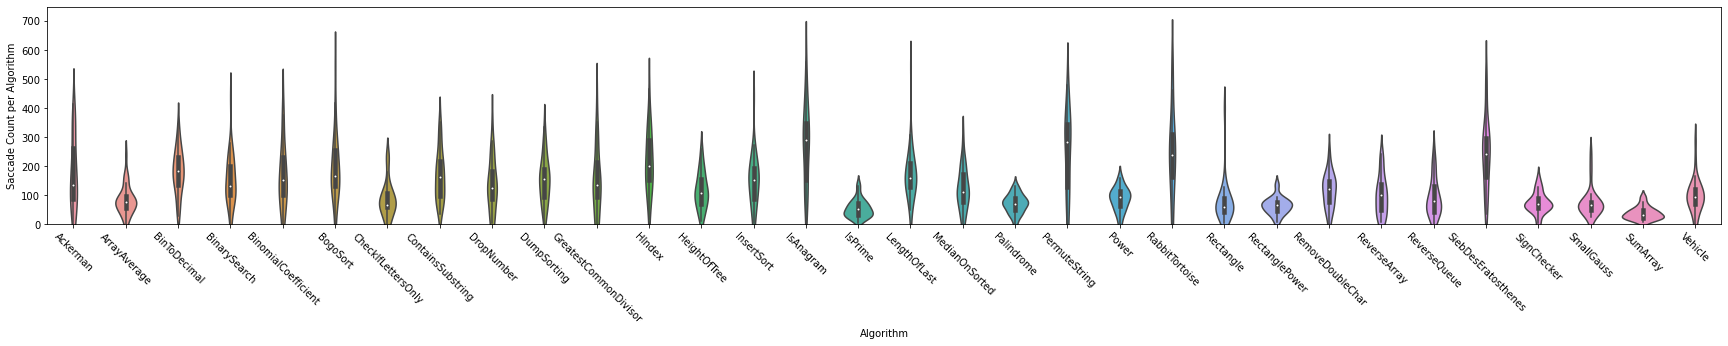

In [15]:
# plot the fixation count per algorithm
plt.figure(figsize=(30, 4))
sns.violinplot(x="Algorithm", y="SaccadeDuration", data=df_saccade_count)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Count per Algorithm")
plt.ylim(0,)
plt.show()

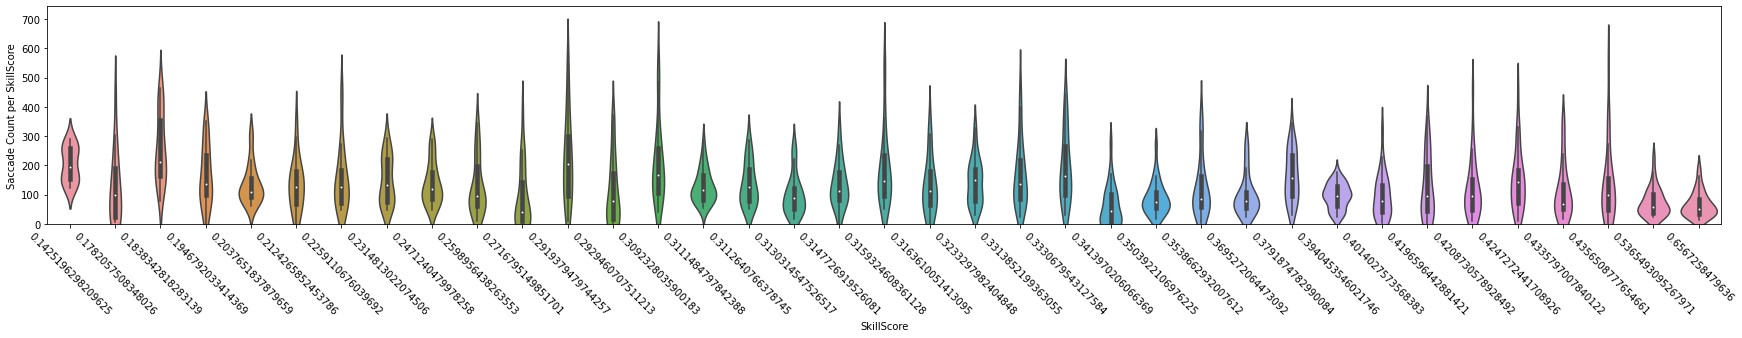

In [16]:
# plot the saccade count per SkillScoreValue
plt.figure(figsize=(30, 4))
df_saccade_count = df_saccade_count.sort_values(by=["SkillScore"])
sns.violinplot(x="SkillScore", y="SaccadeDuration", data=df_saccade_count)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Count per SkillScore")
plt.ylim(0,)
plt.show()

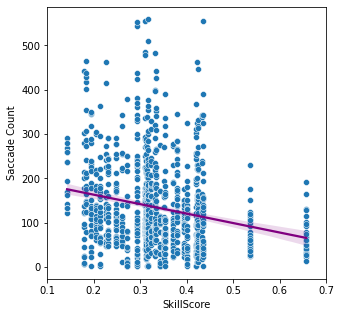

In [17]:
# plot SkillScore vs SaccadeCount
plt.figure(figsize=(5, 5))
sns.scatterplot(x="SkillScore", y="SaccadeDuration", data=df_saccade_count)
sns.regplot(x="SkillScore", y="SaccadeDuration", data=df_saccade_count, scatter=False, color="purple")
plt.ylabel("Saccade Count")
plt.xlim(0.1,0.7)
plt.show()

In [18]:
# calculate the correlation between SkillScore and SaccadeCount
df_saccade_count["SaccadeDuration"].corr(df_saccade_count["SkillScore"])

-0.21200039701010745

## Saccade Duration

In [19]:
# merge in the dataframe on Participant and Algorithm
df_saccade_helper = df_saccades.merge(df_skill, on=["Participant", "Algorithm"])
df_saccade_helper = df_saccade_helper[df_saccade_helper["SaccadeDuration"] < 1.0]
df_saccade_helper = df_saccade_helper.sort_values(by=["SkillScore"])

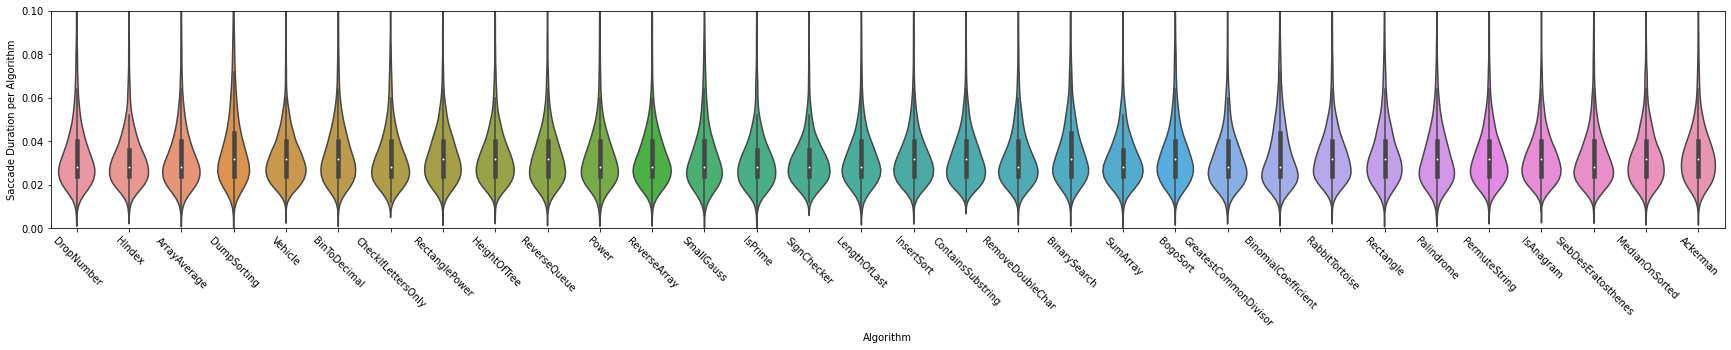

In [20]:
# plot the saccade duration per algorithm
plt.figure(figsize=(30, 4))
sns.violinplot(x="Algorithm", y="SaccadeDuration", data=df_saccade_helper)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Duration per Algorithm")
plt.ylim(0,0.1)
plt.show()

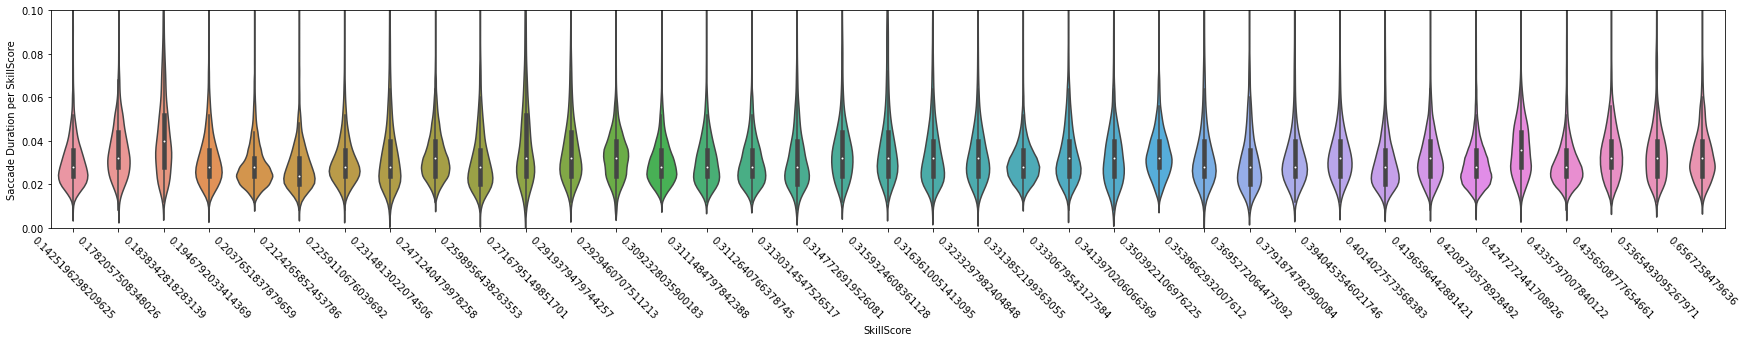

In [21]:
# plot the saccade duration per algorithm
plt.figure(figsize=(30, 4))
sns.violinplot(x="SkillScore", y="SaccadeDuration", data=df_saccade_helper)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Duration per SkillScore")
plt.ylim(0, 0.1)
plt.show()

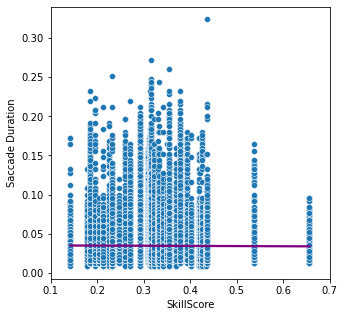

In [22]:
# plot SkillScore vs SaccadeCount
plt.figure(figsize=(5, 5))
sns.scatterplot(x="SkillScore", y="SaccadeDuration", data=df_saccade_helper)
sns.regplot(x="SkillScore", y="SaccadeDuration", data=df_saccade_helper, scatter=False, color="purple")
plt.ylabel("Saccade Duration")
plt.xlim(0.1,0.7)
plt.show()

In [23]:
# calculate the correlation between SkillScore and SaccadeDuration
df_saccade_count["SaccadeDuration"].corr(df_saccade_count["SkillScore"])

-0.21200039701010745

## Saccade Velocity

In [18]:
# merge in the dataframe on Participant and Algorithm
df_saccade_helper = df_saccades.merge(df_skill, on=["Participant", "Algorithm"])
df_saccade_helper = df_saccade_helper[df_saccade_helper["SaccadeDuration"] < 1.0]
df_saccade_helper = df_saccade_helper.sort_values(by=["SkillScore"])

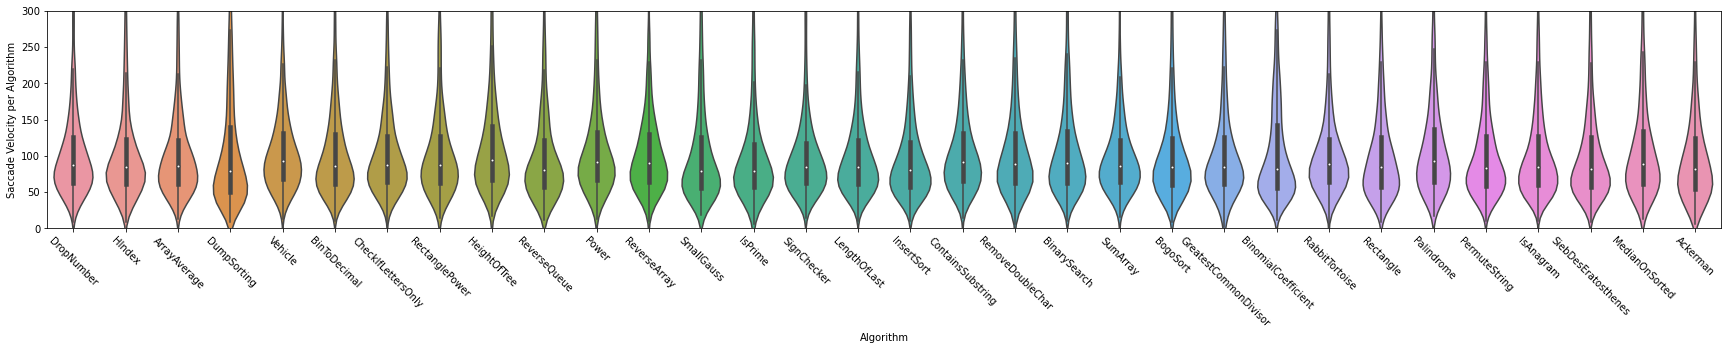

In [19]:
# plot the saccade Velocity per algorithm
plt.figure(figsize=(30, 4))
sns.violinplot(x="Algorithm", y="AvgVel", data=df_saccade_helper)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Velocity per Algorithm")
plt.ylim(0,300)
plt.show()

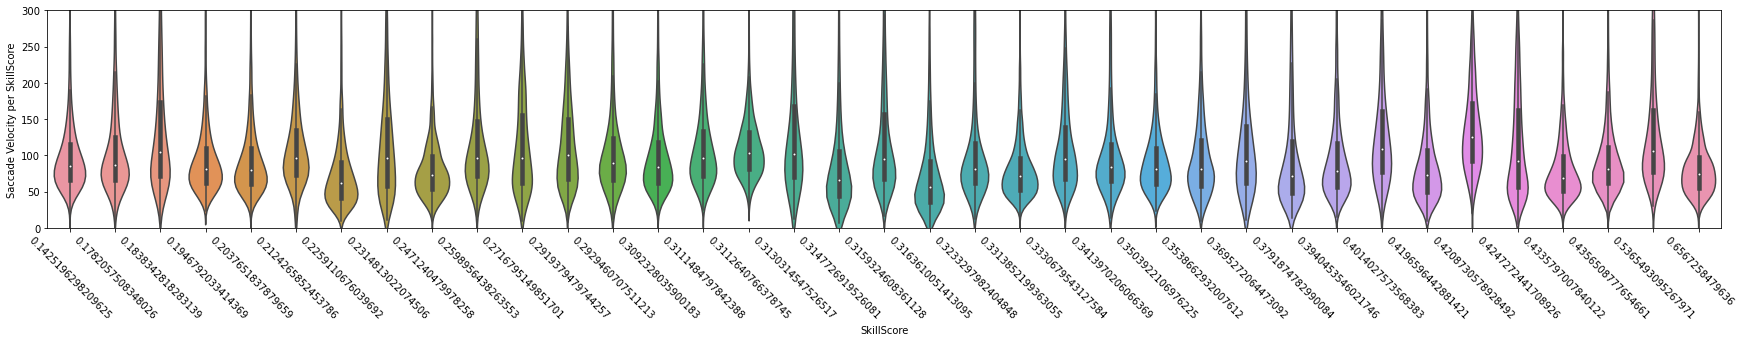

In [20]:
# plot the saccade Velocity per algorithm
plt.figure(figsize=(30, 4))
sns.violinplot(x="SkillScore", y="AvgVel", data=df_saccade_helper)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Velocity per SkillScore")
plt.ylim(0,300)
plt.show()

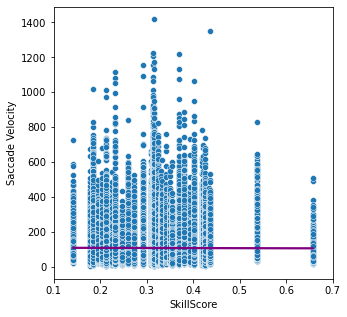

In [21]:
# plot SkillScore vs SaccadeVel
plt.figure(figsize=(5, 5))
sns.scatterplot(x="SkillScore", y="AvgVel", data=df_saccade_helper)
sns.regplot(x="SkillScore", y="AvgVel", data=df_saccade_helper, scatter=False, color="purple")
plt.ylabel("Saccade Velocity")
plt.xlim(0.1,0.7)
plt.show()

In [22]:
# calculate the correlation between SkillScore and SaccadeDuration
df_saccade_helper["AvgVel"].corr(df_saccade_helper["SkillScore"])

-0.006420418686191015

## Saccade Length

In [23]:
# merge in the dataframe on Participant and Algorithm
df_saccade_helper = df_saccades.merge(df_skill, on=["Participant", "Algorithm"])
df_saccade_helper = df_saccade_helper[df_saccade_helper["SaccadeDuration"] < 1.0]
df_saccade_helper["Distance"] = df_saccade_helper\
    .apply(lambda x: np.sqrt(np.power(x["end_x"]-x["start_x"],2) + np.power(x["end_y"]-x["start_y"],2)), axis=1)
df_saccade_helper = df_saccade_helper.sort_values(by=["SkillScore"])

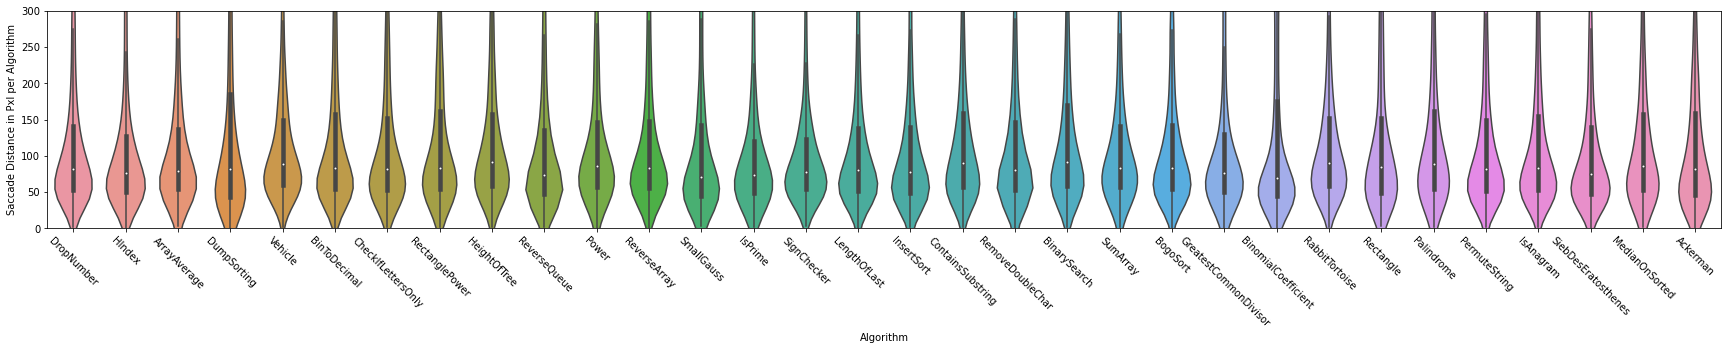

In [24]:
# plot the saccade Distance per algorithm
plt.figure(figsize=(30, 4))
sns.violinplot(x="Algorithm", y="Distance", data=df_saccade_helper)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Distance in Pxl per Algorithm")
plt.ylim(0,300)
plt.show()

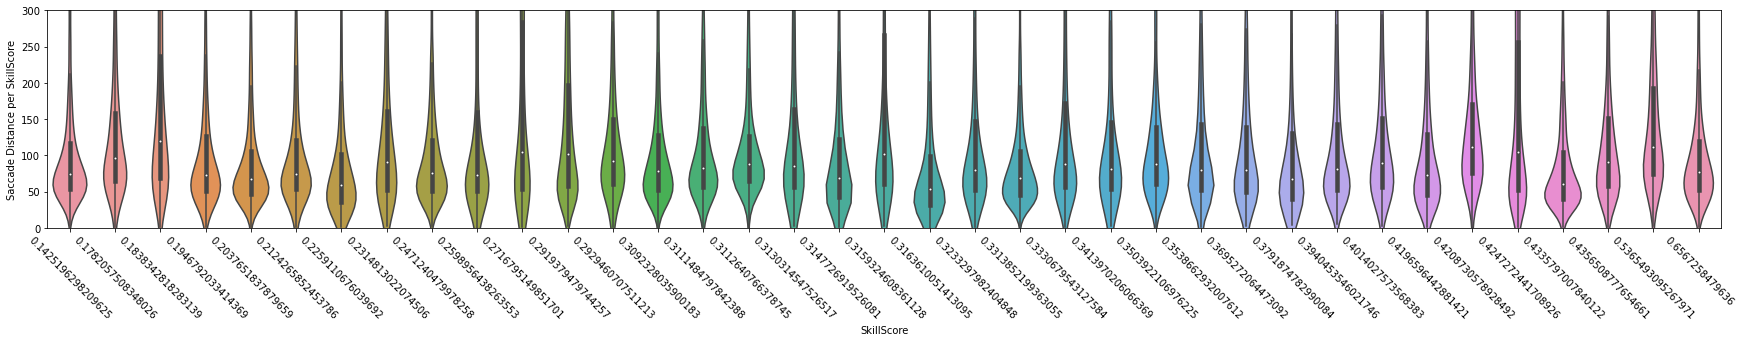

In [25]:
# plot the saccade Distance per SkillScore
plt.figure(figsize=(30, 4))
sns.violinplot(x="SkillScore", y="Distance", data=df_saccade_helper)
# set the rotation of the x labels
plt.xticks(rotation=-45)
plt.ylabel("Saccade Distance per SkillScore")
plt.ylim(0,300)
plt.show()

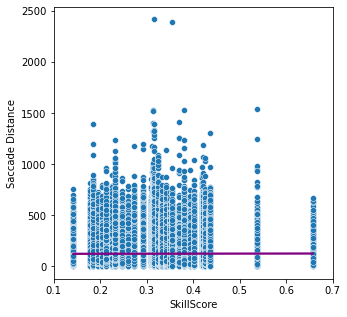

In [26]:
# plot SkillScore vs SaccadeDistance
plt.figure(figsize=(5, 5))
sns.scatterplot(x="SkillScore", y="Distance", data=df_saccade_helper)
sns.regplot(x="SkillScore", y="Distance", data=df_saccade_helper, scatter=False, color="purple")
plt.ylabel("Saccade Distance")
plt.xlim(0.1,0.7)
plt.show()

In [27]:
# calculate the correlation between SkillScore and SaccadeDistance
df_saccade_helper["Distance"].corr(df_saccade_helper["SkillScore"])

0.004254634969126511

## Saccade Direction And Distance

In [ ]:
offset = -math.pi/16
bin_size = math.pi/8


In [24]:
df_saccade_helper = df_saccades.merge(df_skill, on=["Participant", "Algorithm"])
df_saccade_helper = df_saccade_helper[df_saccade_helper["SaccadeDuration"] < 1.0]
df_saccade_helper["Distance"] = df_saccade_helper.apply(lambda x: np.sqrt(np.power(x["end_x"]-x["start_x"],2) + np.power(x["end_y"]-x["start_y"],2)), axis=1)
df_saccade_helper["Direction"] = df_saccade_helper.apply(lambda x: np.arctan2(x["end_y"]-x["start_y"], x["end_x"]-x["start_x"]), axis=1)
df_saccade_helper = df_saccade_helper[["Algorithm", "Participant", "SkillScore", "Direction", "Distance"]]
df_saccade_helper

,Algorithm,Participant,SkillScore,Direction,Distance
0,IsPrime,1,0.331385,-0.080090,78.112097
1,IsPrime,1,0.331385,-0.007821,105.511031
2,IsPrime,1,0.331385,3.013312,176.871406
3,IsPrime,1,0.331385,-2.878223,64.836337
4,IsPrime,1,0.331385,3.110005,44.492507
...,...,...,...,...,...
136627,Rectangle,71,0.435651,0.460384,239.257331
136628,Rectangle,71,0.435651,-2.049519,346.158607
136629,Rectangle,71,0.435651,-2.284784,191.105460
136630,Rectangle,71,0.435651,1.298997,127.722498


In [29]:
x1 = 0
x2 = 0
y1 = 0
y2 = -1
np.arctan2(y2-y1, x2-x1)

-1.5707963267948966